In [35]:
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import statsmodels.api as sma
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

from pandas.api.types import CategoricalDtype

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

In [56]:
df = pd.read_excel('C:/Users/lizag/OneDrive/Рабочий стол/Управление талантами/Финальный проект/DBTC2.xlsx', sheet_name = 'Answers')


In [57]:
df = df[df['Talents'] == 1].drop(columns = 'Talents')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 98 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   City                                                    170 non-null    float64
 1   Gender                                                  170 non-null    int64  
 2   Grade                                                   170 non-null    int64  
 3   RolesN                                                  170 non-null    int64  
 4   Software Development                                    170 non-null    int64  
 5   QA & Testing                                            170 non-null    int64  
 6   Business & Functional Analysis                          170 non-null    int64  
 7   Infrastructure                                          170 non-null    int64  
 8   Project Management                      

## Описательный анализ

([<matplotlib.patches.Wedge at 0x226498ba108>,
 [Text(-1.095307584980848, 0.10149529192737142, '1'),
  Text(1.095307576072086, -0.10149538806808751, '0')],
 [Text(-0.5974405008986443, 0.05536106832402077, '97.1%'),
  Text(0.5974404960393196, -0.05536112076441137, '2.9%')])

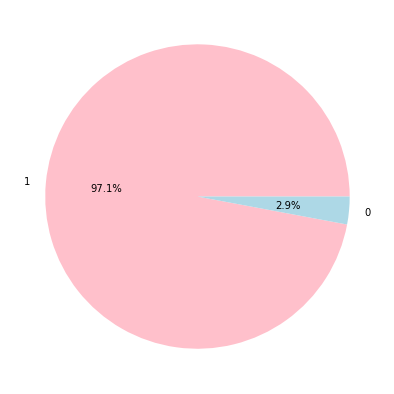

In [40]:
labels = df.IllrecommendcompanyAsEmployer.value_counts().index
colors = ["pink","lightblue"]
sizes = df.IllrecommendcompanyAsEmployer.value_counts().values
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")

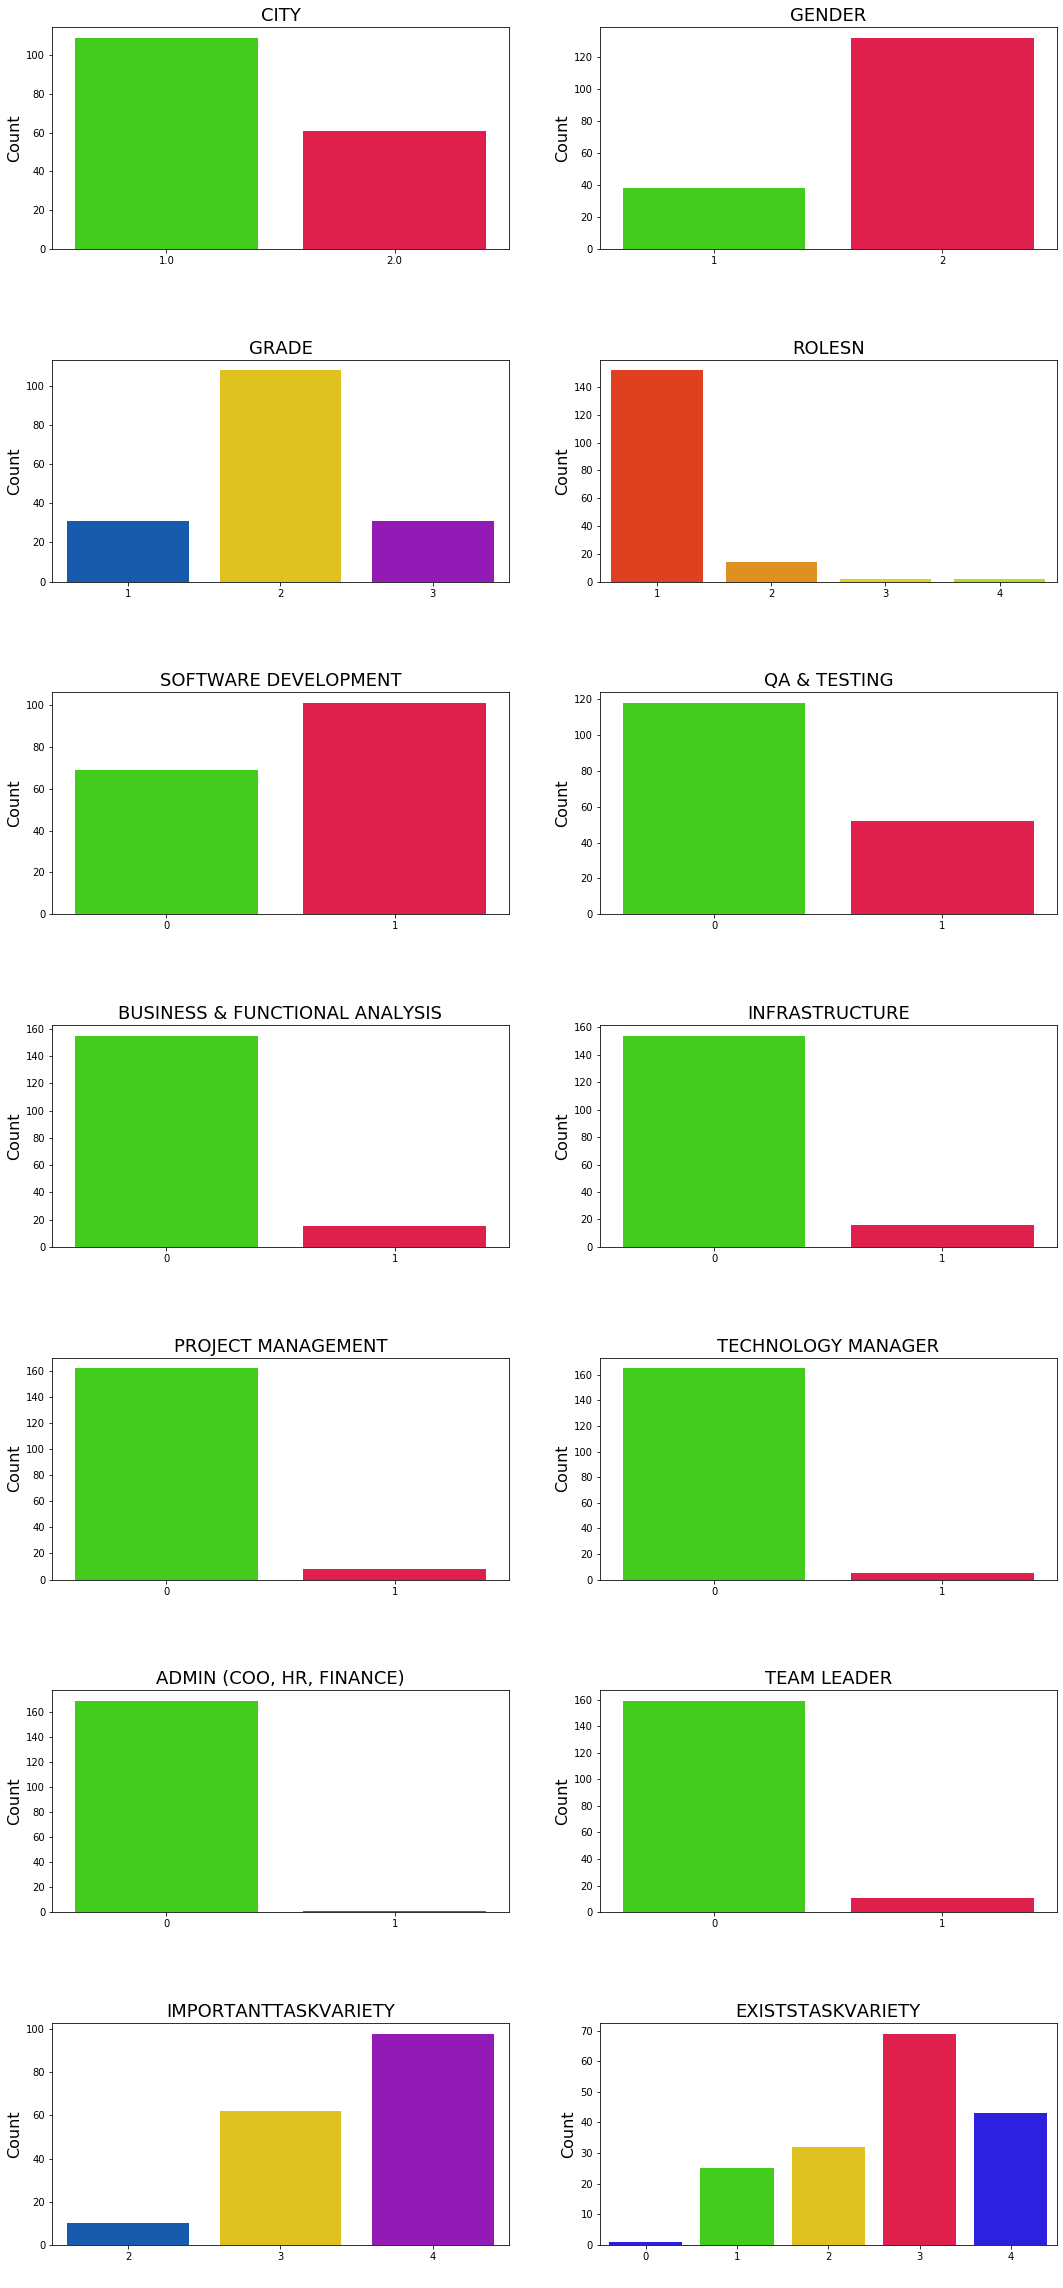

In [41]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(18,35))
fig.subplots_adjust(hspace=0.5, bottom=0)

for ax, catplot in zip(axes.flatten(), df):
        sns.countplot(x=catplot, data=df, ax=ax, palette='prism')
        ax.set_title(catplot.upper(), fontsize=18)
        ax.set_ylabel('Count', fontsize=16)
        ax.set_xlabel(' ', fontsize=15)

###  Создание дамми-переменных

In [49]:
"""
Преобразование в dummy - переменные с сохранением NA, если они присутствуют. 
"""

def dummy_serie(df, col):
    tab = pd.get_dummies(df[col], prefix = col)
    tab.loc[df[col].isnull(), tab.columns.str.startswith(str(col))] = np.nan
    return(tab)

def dummification(df, cat_vars):
    data = df[cat_vars]
    tab = pd.DataFrame()
    for col in data:
        tab = pd.concat([dummy_serie(df, col), tab], axis = 1)
    
    tab = tab[tab.columns[::-1]]
    df =df.drop(columns = cat_vars)
    df = pd.concat([df, tab], axis = 1)
        
    return(df)

In [58]:
cat_vars = ['City', 'Gender']
df = dummification(df, cat_vars)
df = df.drop(columns = 'Gender_2')
df = df.drop(columns = 'City_2.0')


### Сравненительный анализ

* FullNegativeInformationJobOffer - таланты лучше осведомлены об отрицательных сторонах оффера
* IworkherebeacauseIWantRhatherthanMust - таланты в большей степени работают по желанию, чем по необходимости (эта, кстати, связана с возрастом - чем он выше, тем больше необходимости в работе нежели желания)
* ExistsOptionsProjectTeamChange - у талантов возможность сменить проект/ команду меньше
* ExistsFullCycleDevInfluence - у талантов возможность влиять на полный цикл разработки ПО меньше
* ExistsDiversityAndInclusion - таланты в целом ниже оценивают приверженность организации принципам социального разнообразия (diversity and inclusion)
* ImportantWorkWithExperiencedPofessionals - для талантов критически важно работать с опытными и профессиональными людьми (почти все отметили 4, у не талантов есть разброс оценок)
* ExistsTaskVariety - у талантов разнообразие текущих рабочих задач меньше, чем у не талантов. Это, возможно, связано ещё и с тем, что они только одну роль выполняют в отличие от не талантов
* ExistsTimelyRelevanCommuniOrg - таланты выше оценивать своевременность и достоверность коммуникации о том, что происходит в жизни организации

## Выводы по корреляциям

* ImportantFriendlyResponsiveColleagues ~ ImportantWorkInUnitedTeam 0,7
* ExistsFriendlyResponsiveColleagues ~ ExistsWorkInUnitedTeam 0,7
* ImportantRoleModelManagemer ~ ImportantInspirationalManager 0,7
* ExistsRoleModelManagemer ~ ExistsInspirationalManager 0,7


* Age ~ Grade 0,6
* IAmPartOrganisation ~ ICanActualiseMyselfProfessionallyHere 0,6
* ExistsProfExperiseIncrease ~ ExistsEnhanceMyJobMarketRelevance 0,6
* ExistsWorkInUnitedTeam ~ ExistsInspirationalManager 0,6
* ImportantDynamicEvironment ~ ExitstDynamicEvironment 0,6
* ExistsInspirationalManager ~ ExistsTimlyUnderstandableFeedBackManager 0,6
* ImportantTimlyUnderstandableFeedBackManager ~ ImportantJobImportanceColleaguesManagerAppec 0,6
* 

* ExistsTaskVariety ~ ExistsProfExperiseIncrease 0,5
* ExistsWorkWithExperiencedPofessionals ~ ExistsProfExperiseIncrease 0,5
* ICanActualiseMyselfProfessionallyHere ~ ExistsProfExperiseIncrease 0,5
* ExistsCareerLadderPromot ~ ExistsFullCycleDevInfluence 0,5
* ExistsCareerLadderPromot ~ ExistsEnhaceManagerialCompetenceDecisionMakInfuence 0,5
* ExistsCareerLadderPromot ~ ExistsJobImportanceColleaguesManagerAppec 0,5
* ExistsModernTechnologyUse ~ ExistsInnovProjectParticipOptions 0,5
* ImportantBusinessTripANDNetworking ~ ImportantCanMoveOtherSubquarters
* ExistsProfessTrainingsDev ~ ExistsProfConferenceParticip
* ImportantFriendlyResponsiveColleagues ~ ImportantWorkWithExperiencedPofessionals
* ExistsFriendlyResponsiveColleagues ~ ExistsWorkWithExperiencedPofessionals
* ExistsFriendlyResponsiveColleagues ~ ExistsRoleModelManagemer
* ExistsFriendlyResponsiveColleagues ~ ExistsInspirationalManager
* ExistsFriendlyResponsiveColleagues ~ ExistsCorpCultureEnviron
и др. переменные, их очень-очень много


* ImportantSocialPackage ~ ImportantCompetitiveSalary 0,5


* ICanActualiseMyselfProfessionallyHere ~ RealityWorseThanExpectations -0,5
* ExistsRoleModelManagemer ~ RealityWorseThanExpectations -0,5
* ExistsCorpCultureEnviron ~ RealityWorseThanExpectations -0,4
* IAmPartOrganisation ~ RealityWorseThanExpectations -0,4
* IworkherebeacauseIWantRhatherthanMust ~ RealityWorseThanExpectations -0,4
* ExistsTaskVariety ~ RealityWorseThanExpectations -0,4
* ExistsProfExperiseIncrease ~ RealityWorseThanExpectations -0,4
* ExistsWorkWithExperiencedPofessionals ~ RealityWorseThanExpectations -0,4
* ExistsInspirationalManager ~ RealityWorseThanExpectations -0,4
* ExistsJobImportanceBusiGoalConnect ~ RealityWorseThanExpectations -0,4
* ExistsJobImportanceColleaguesManagerAppec ~ RealityWorseThanExpectations -0,4
* ExistsInnovProjectParticipOptions ~ RealityWorseThanExpectations -0,3
* ExistsCareerLadderPromot ~ RealityWorseThanExpectations -0,3
* ExistsFullCycleDevInfluence ~ RealityWorseThanExpectations -0,3
* ExistsFriendlyResponsiveColleagues ~ RealityWorseThanExpectations -0,3
* ExistsWorkInUnitedTeam ~ RealityWorseThanExpectations -0,3
* ExistsTimlyUnderstandableFeedBackManager ~ RealityWorseThanExpectations -0,3
* ExistsOpportinityToOfferAndRealIdeas ~ RealityWorseThanExpectations -0,3
* ExistsTimelyRelevanCommuniOrg  ~ RealityWorseThanExpectations -0,3
* ImportantWorkStableReliableCompany ~ RealityWorseThanExpectations -0,3
* EsistsComfWorkPlaceAndNesSoftware ~ RealityWorseThanExpectations -0,3
* `FullNegativeInformationJobOffer` ~ RealityWorseThanExpectations -0,3


* ExistsOfficeLocation вообще ни с чем не коррелирует

## Создание таргетных переменных

Создание таргетных переменных с порогом по медиане

In [76]:
cat_list = ['RealityBetterThanExpectations', 'RealityWorseThanExpectations', 'IAmPartOrganisation', 'ICanActualiseMyselfProfessionallyHere ', 'IworkherebeacauseIWantRhatherthanMust']

df['RealityBetterThanExpectations_targ'] = (df['RealityBetterThanExpectations'] >= np.median(df['RealityBetterThanExpectations'])).astype(int)
df['RealityWorseThanExpectations_targ'] = (df['RealityWorseThanExpectations'] >= np.median(df['RealityWorseThanExpectations'])).astype(int)
df['IAmPartOrganisation_targ'] = (df['IAmPartOrganisation'] >= np.median(df['IAmPartOrganisation'])).astype(int)
df['ICanActualiseMyselfProfessionallyHere_targ'] = (df['ICanActualiseMyselfProfessionallyHere '] >= np.median(df['ICanActualiseMyselfProfessionallyHere '])).astype(int)
df['IworkherebeacauseIWantRhatherthanMust_targ'] = (df['IworkherebeacauseIWantRhatherthanMust'] >= np.median(df['IworkherebeacauseIWantRhatherthanMust'])).astype(int)


## Регрессии только по талантам

In [69]:
reg_data = df.drop(columns=['IllrecommendcompanyAsEmployer']).dropna()
y = df.drop(columns=[]).dropna()[['IllrecommendcompanyAsEmployer']]
logregr = pd.DataFrame()

for col in reg_data.columns:
    v = reg_data[col].name
    logit_model=sma.GLM(y, sma.add_constant(reg_data[[col]]), family = sma.families.Binomial())
    result=logit_model.fit()
    params = np.exp(result.params)[1]
    conf0 = np.exp(result.conf_int())[0][1]
    conf1 = np.exp(result.conf_int())[1][1]
    p = result.pvalues[1]
    logregr = logregr.append({'Names': v, 'OR': '{0:.2f}'.format(params), 'lower': '{0:.2f}'.format(conf0), 'upper': '{0:.2f}'.format(conf1),'p_val': p}, ignore_index=True)
            
logregr = logregr.reindex(columns=['Names', 'OR', 'lower', 'upper', 'p_val']) 
logregr = logregr[logregr['p_val'] < 0.05]
logregr

C:\Users\lizag\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
C:\Users\lizag\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


,Names,OR,lower,upper,p_val
6,Project Management,0.06,0.01,0.40,0.004201
11,ExistsTaskVariety,6.05,1.58,23.11,0.008518
12,ImportantProfExperiseIncrease,4.40,1.49,13.01,0.007471
13,ExistsProfExperiseIncrease,5.07,1.88,13.67,0.001341
15,ExistsCareerLadderPromot,12.90,2.65,62.80,0.001546
17,ExistsFullCycleDevInfluence,3.44,1.35,8.73,0.009470
19,ExistsModernTechnologyUse,4.11,1.50,11.23,0.005918
27,ExistsProfessTrainingsDev,2.73,1.19,6.23,0.017531
29,ExistsProfConferenceParticip,2.50,1.04,6.02,0.040931
31,ExistsOptionsProjectTeamChange,5.85,1.68,20.39,0.005526


In [70]:
multi = regr_multi(df.dropna(), group = 'IllrecommendcompanyAsEmployer', lst = list(logregr['Names']), save_tab = False)
multi[multi['p_val'] < 0.05].drop(columns = 'Names').sort_values('OR', ascending = False)

NameError: name 'regr_multi' is not defined

## 'RealityBetterThanExpectations_targ'

In [72]:
reg_data = df.drop(columns=['RealityBetterThanExpectations_targ', 'RealityBetterThanExpectations']).dropna()
y = df.dropna()[['RealityBetterThanExpectations_targ']]
logregr = pd.DataFrame()

for col in reg_data.columns:
    v = reg_data[col].name
    logit_model=sma.GLM(y, sma.add_constant(reg_data[[col]]), family = sma.families.Binomial())
    result=logit_model.fit()
    params = np.exp(result.params)[1]
    conf0 = np.exp(result.conf_int())[0][1]
    conf1 = np.exp(result.conf_int())[1][1]
    p = result.pvalues[1]
    logregr = logregr.append({'Names': v, 'OR': '{0:.2f}'.format(params), 'lower': '{0:.2f}'.format(conf0), 'upper': '{0:.2f}'.format(conf1),'p_val': p}, ignore_index=True)
            
logregr = logregr.reindex(columns=['Names', 'OR', 'lower', 'upper', 'p_val']) 
logregr = logregr[logregr['p_val'] < 0.05]
logregr

C:\Users\lizag\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
C:\Users\lizag\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


,Names,OR,lower,upper,p_val
11,ExistsTaskVariety,2.41,1.69,3.45,1.406182e-06
13,ExistsProfExperiseIncrease,2.25,1.58,3.21,6.618120e-06
15,ExistsCareerLadderPromot,1.49,1.07,2.09,1.889967e-02
17,ExistsFullCycleDevInfluence,1.61,1.21,2.14,1.175628e-03
20,ImportantComplextProductServiceWork,1.45,1.01,2.07,4.468952e-02
21,ExistsComplextProductServiceWork,1.64,1.14,2.35,7.857592e-03
22,ImportantBusinessTripANDNetworking,1.42,1.03,1.96,3.249820e-02
24,ImportantCanMoveOtherSubquarters,1.35,1.03,1.77,2.874319e-02
25,ExistsCanMoveOtherSubquarters,1.55,1.09,2.20,1.442259e-02
26,ImportantProfessTrainingsDev,2.01,1.36,2.98,4.279626e-04


In [73]:
lst = list(logregr['Names'])
lst.remove('RealityWorseThanExpectations_targ')
lst.remove('RealityWorseThanExpectations')

In [74]:
multi = regr_multi(Talents.dropna(), group = 'RealityBetterThanExpectations_targ', lst = lst, save_tab = False)
multi = multi[multi['p_val'] < 0.05].drop(columns = 'Names').sort_values('OR', ascending = False)
multi

NameError: name 'regr_multi' is not defined

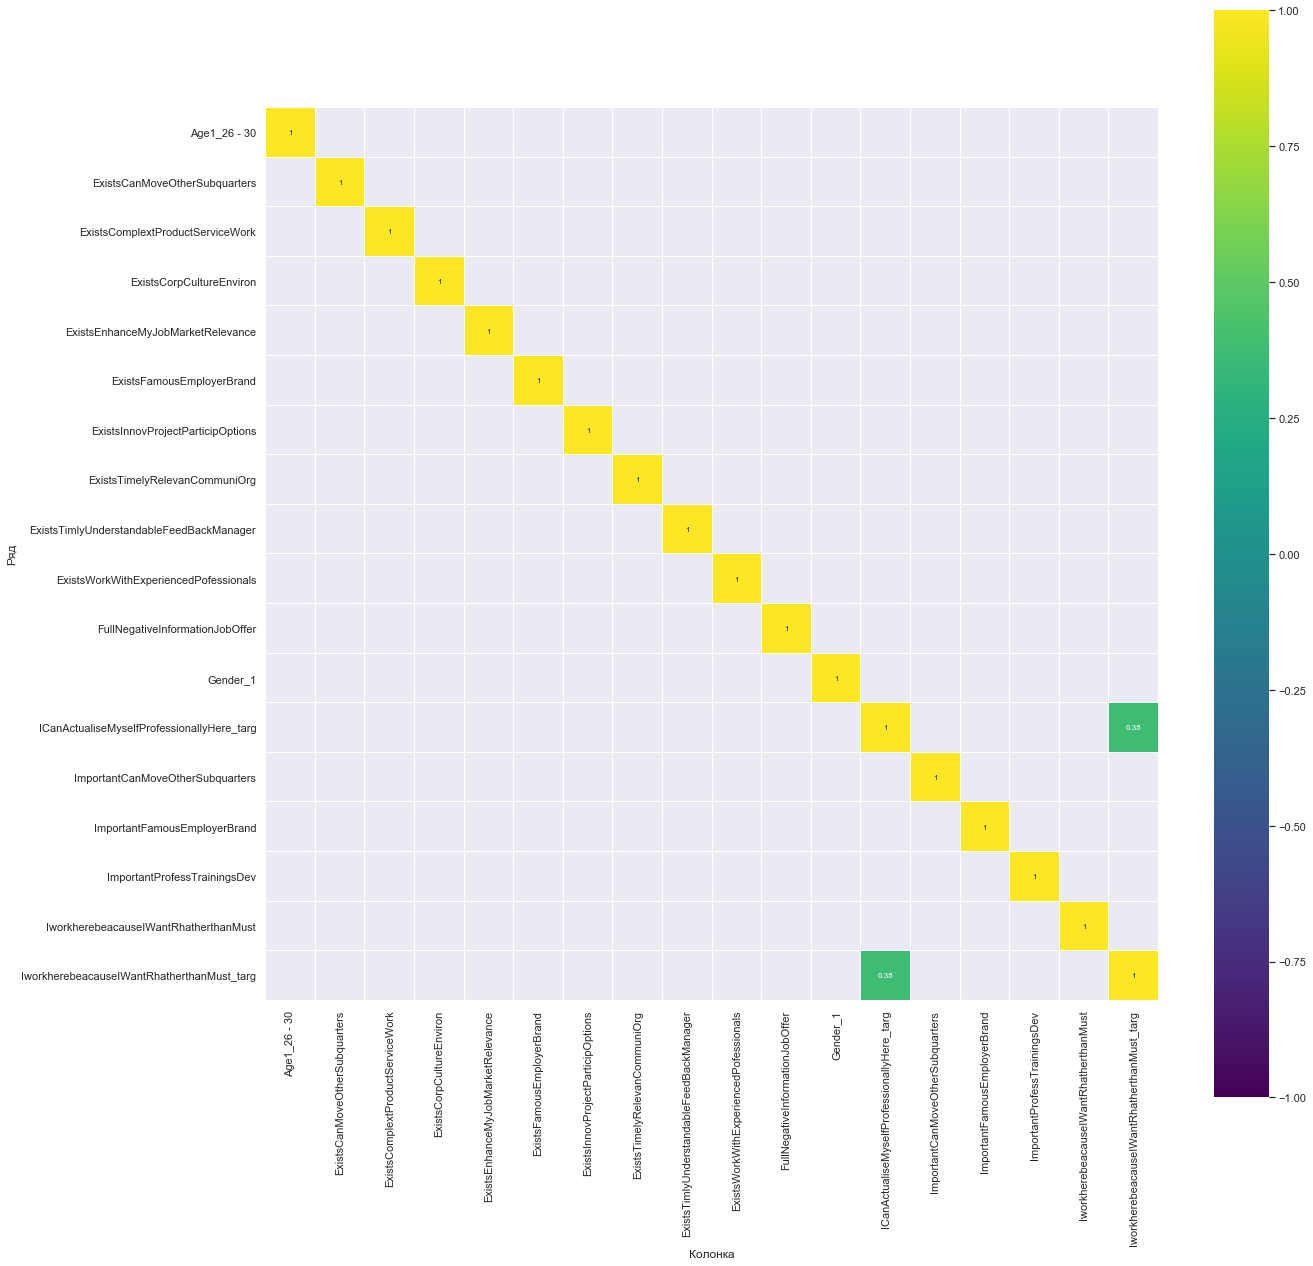

In [57]:
from sklearn.metrics import matthews_corrcoef

tab = pd.DataFrame()

for i in Talents[list(multi.index)]:
    for j in Talents[list(multi.index)]:
        tabb = Talents[[i,j]].dropna()
        N = matthews_corrcoef(tabb.iloc[:,0], tabb.iloc[:,1])
        Se_new = i
        Sp_new = j
        tab = tab.append({'Ряд': Se_new, 'Колонка': Sp_new, 'Коэфф. Мэтью' : N}, ignore_index=True)

tab = tab.pivot(index='Ряд', columns='Колонка', values='Коэфф. Мэтью')

sns.set(style = 'darkgrid')
plt.figure(figsize=(20, 20))
sns.heatmap(tab[(tab >= 0.3) | (tab <= -0.29)].round(2), cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True)
plt.show()

## RealityWorseThanExpectations_targ

In [77]:
reg_data = df.drop(columns=['RealityWorseThanExpectations_targ', 'RealityWorseThanExpectations']).dropna()
y = df.drop(columns=[]).dropna()[['RealityWorseThanExpectations_targ']]
logregr = pd.DataFrame()

for col in reg_data.columns:
    v = reg_data[col].name
    logit_model=sma.GLM(y, sma.add_constant(reg_data[[col]]), family = sma.families.Binomial())
    result=logit_model.fit()
    params = np.exp(result.params)[1]
    conf0 = np.exp(result.conf_int())[0][1]
    conf1 = np.exp(result.conf_int())[1][1]
    p = result.pvalues[1]
    logregr = logregr.append({'Names': v, 'OR': '{0:.2f}'.format(params), 'lower': '{0:.2f}'.format(conf0), 'upper': '{0:.2f}'.format(conf1),'p_val': p}, ignore_index=True)
            
logregr = logregr.reindex(columns=['Names', 'OR', 'lower', 'upper', 'p_val']) 
logregr = logregr[logregr['p_val'] < 0.05]
logregr

C:\Users\lizag\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
C:\Users\lizag\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


,Names,OR,lower,upper,p_val
2,Software Development,2.39,1.26,4.54,7.875847e-03
3,QA & Testing,0.47,0.24,0.93,2.914216e-02
4,Business & Functional Analysis,0.34,0.11,1.00,4.926962e-02
10,ImportantTaskVariety,0.49,0.27,0.87,1.458385e-02
11,ExistsTaskVariety,0.42,0.28,0.62,1.516257e-05
13,ExistsProfExperiseIncrease,0.40,0.26,0.62,3.370553e-05
15,ExistsCareerLadderPromot,0.50,0.34,0.72,2.674132e-04
17,ExistsFullCycleDevInfluence,0.64,0.47,0.86,3.562441e-03
19,ExistsModernTechnologyUse,0.65,0.47,0.89,8.098335e-03
25,ExistsCanMoveOtherSubquarters,0.50,0.34,0.74,4.872329e-04


In [78]:
lst = list(logregr['Names'])
lst.remove('RealityBetterThanExpectations_targ')
lst.remove('RealityBetterThanExpectations')

In [79]:
multi = regr_multi(Talents.dropna(), group = 'RealityWorseThanExpectations_targ', lst = lst, save_tab = False)
multi = multi[multi['p_val'] < 0.05].drop(columns = 'Names').sort_values('OR', ascending = False)
multi

NameError: name 'regr_multi' is not defined

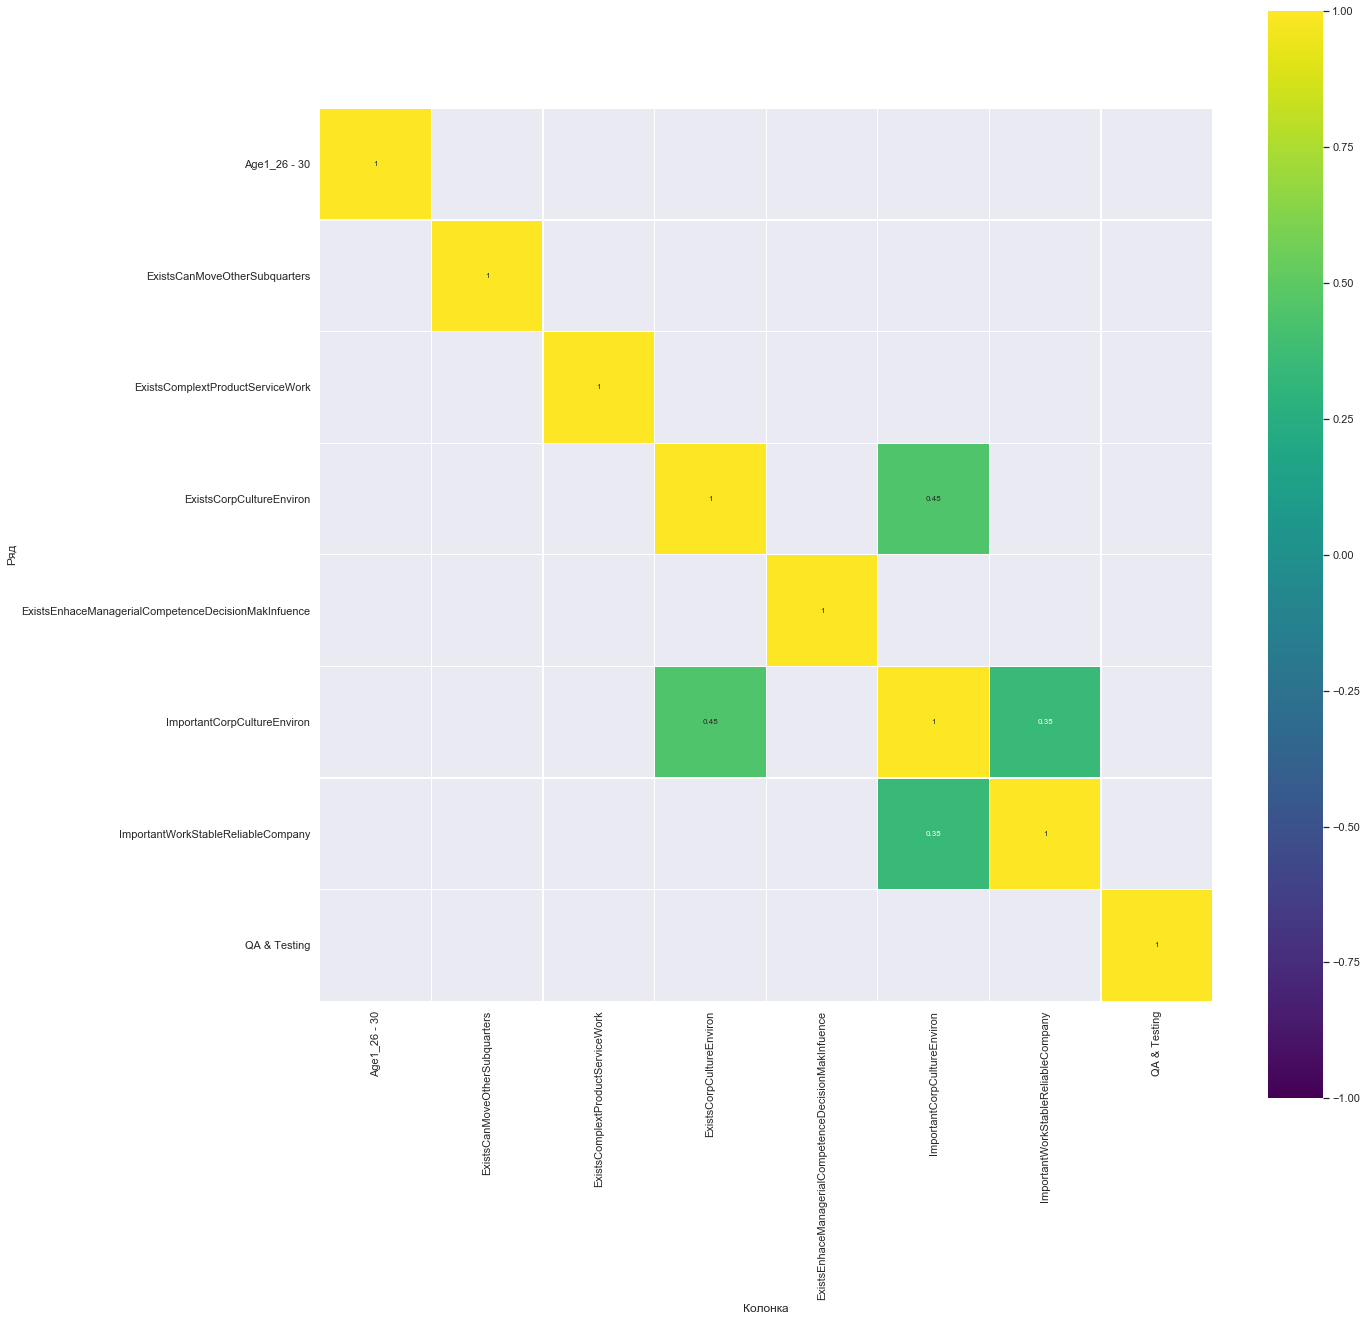

In [62]:
tab = pd.DataFrame()

for i in Talents[list(multi.index)]:
    for j in Talents[list(multi.index)]:
        tabb = Talents[[i,j]].dropna()
        N = matthews_corrcoef(tabb.iloc[:,0], tabb.iloc[:,1])
        Se_new = i
        Sp_new = j
        tab = tab.append({'Ряд': Se_new, 'Колонка': Sp_new, 'Коэфф. Мэтью' : N}, ignore_index=True)

tab = tab.pivot(index='Ряд', columns='Колонка', values='Коэфф. Мэтью')

sns.set(style = 'darkgrid')
plt.figure(figsize=(20, 20))
sns.heatmap(tab[(tab >= 0.3) | (tab <= -0.29)].round(2), cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True)
plt.show()

## IAmPartOrganisation_targ

In [80]:
reg_data = df.drop(columns=['IAmPartOrganisation_targ', 'IAmPartOrganisation']).dropna()
y = df.drop(columns=[]).dropna()[['IAmPartOrganisation_targ']]
logregr = pd.DataFrame()

for col in reg_data.columns:
    v = reg_data[col].name
    logit_model=sma.GLM(y, sma.add_constant(reg_data[[col]]), family = sma.families.Binomial())
    result=logit_model.fit()
    params = np.exp(result.params)[1]
    conf0 = np.exp(result.conf_int())[0][1]
    conf1 = np.exp(result.conf_int())[1][1]
    p = result.pvalues[1]
    logregr = logregr.append({'Names': v, 'OR': '{0:.2f}'.format(params), 'lower': '{0:.2f}'.format(conf0), 'upper': '{0:.2f}'.format(conf1),'p_val': p}, ignore_index=True)
            
logregr = logregr.reindex(columns=['Names', 'OR', 'lower', 'upper', 'p_val']) 
logregr = logregr[logregr['p_val'] < 0.05]
logregr

C:\Users\lizag\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
C:\Users\lizag\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


,Names,OR,lower,upper,p_val
11,ExistsTaskVariety,1.78,1.27,2.49,8.549454e-04
12,ImportantProfExperiseIncrease,2.74,1.19,6.27,1.743094e-02
13,ExistsProfExperiseIncrease,1.72,1.26,2.36,6.784297e-04
14,ImportantCareerLadderPromot,1.59,1.02,2.48,4.081066e-02
15,ExistsCareerLadderPromot,2.06,1.39,3.06,2.952252e-04
16,ImportantFullCycleDevInfluence,1.57,1.10,2.23,1.329983e-02
17,ExistsFullCycleDevInfluence,1.64,1.21,2.23,1.321056e-03
19,ExistsModernTechnologyUse,1.81,1.32,2.48,2.414648e-04
20,ImportantComplextProductServiceWork,1.53,1.05,2.22,2.528418e-02
31,ExistsOptionsProjectTeamChange,1.53,1.01,2.29,4.248432e-02


In [81]:
multi = regr_multi(Talents.dropna(), group = 'IAmPartOrganisation_targ', lst = list(logregr['Names']), save_tab = False)
multi = multi[multi['p_val'] < 0.05].drop(columns = 'Names').sort_values('OR', ascending = False)
multi 

NameError: name 'regr_multi' is not defined

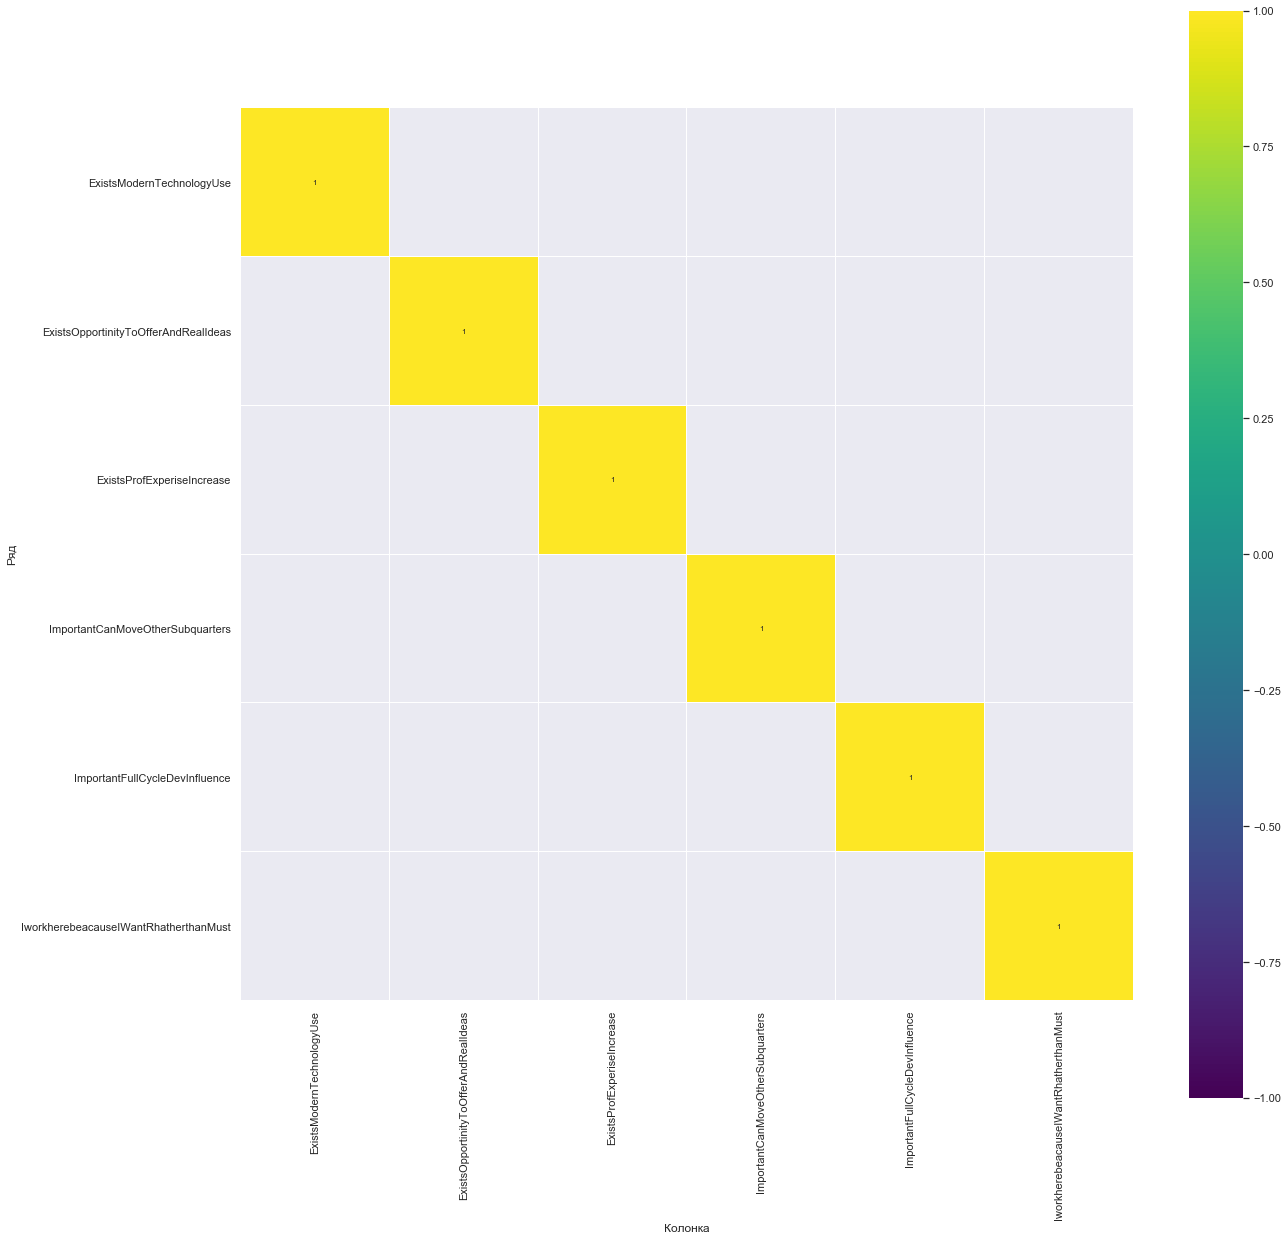

In [65]:
tab = pd.DataFrame()

for i in Talents[list(multi.index)]:
    for j in Talents[list(multi.index)]:
        tabb = Talents[[i,j]].dropna()
        N = matthews_corrcoef(tabb.iloc[:,0], tabb.iloc[:,1])
        Se_new = i
        Sp_new = j
        tab = tab.append({'Ряд': Se_new, 'Колонка': Sp_new, 'Коэфф. Мэтью' : N}, ignore_index=True)

tab = tab.pivot(index='Ряд', columns='Колонка', values='Коэфф. Мэтью')

sns.set(style = 'darkgrid')
plt.figure(figsize=(20, 20))
sns.heatmap(tab[(tab >= 0.3) | (tab <= -0.29)].round(2), cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True)
plt.show()

## ICanActualiseMyselfProfessionallyHere_targ

In [82]:
reg_data = df.drop(columns=['ICanActualiseMyselfProfessionallyHere_targ', 'ICanActualiseMyselfProfessionallyHere ']).dropna()
y = df.drop(columns=[]).dropna()[['ICanActualiseMyselfProfessionallyHere_targ']]
logregr = pd.DataFrame()

for col in reg_data.columns:
    v = reg_data[col].name
    logit_model=sma.GLM(y, sma.add_constant(reg_data[[col]]), family = sma.families.Binomial())
    result=logit_model.fit()
    params = np.exp(result.params)[1]
    conf0 = np.exp(result.conf_int())[0][1]
    conf1 = np.exp(result.conf_int())[1][1]
    p = result.pvalues[1]
    logregr = logregr.append({'Names': v, 'OR': '{0:.2f}'.format(params), 'lower': '{0:.2f}'.format(conf0), 'upper': '{0:.2f}'.format(conf1),'p_val': p}, ignore_index=True)
            
logregr = logregr.reindex(columns=['Names', 'OR', 'lower', 'upper', 'p_val']) 
logregr = logregr[logregr['p_val'] < 0.05]
logregr

C:\Users\lizag\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
C:\Users\lizag\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


,Names,OR,lower,upper,p_val
11,ExistsTaskVariety,2.39,1.65,3.47,4.669885e-06
13,ExistsProfExperiseIncrease,3.05,2.05,4.55,4.275188e-08
15,ExistsCareerLadderPromot,2.36,1.55,3.59,5.715682e-05
17,ExistsFullCycleDevInfluence,1.82,1.32,2.50,2.277887e-04
19,ExistsModernTechnologyUse,1.87,1.35,2.58,1.577543e-04
21,ExistsComplextProductServiceWork,2.15,1.44,3.21,1.712786e-04
27,ExistsProfessTrainingsDev,2.19,1.51,3.18,3.984279e-05
32,ImportantShareExperANDEducColleagues,1.49,1.02,2.17,3.790238e-02
33,ExistsShareExperANDEducColleagues,1.95,1.30,2.92,1.128091e-03
35,ExistsEnhaceManagerialCompetenceDecisionMakInf...,1.75,1.20,2.55,3.833034e-03


In [83]:
multi = regr_multi(Talents.dropna(), group = 'ICanActualiseMyselfProfessionallyHere_targ', lst = list(logregr['Names']), save_tab = False)
multi = multi[multi['p_val'] < 0.05].drop(columns = 'Names').sort_values('OR', ascending = False)
multi

NameError: name 'regr_multi' is not defined

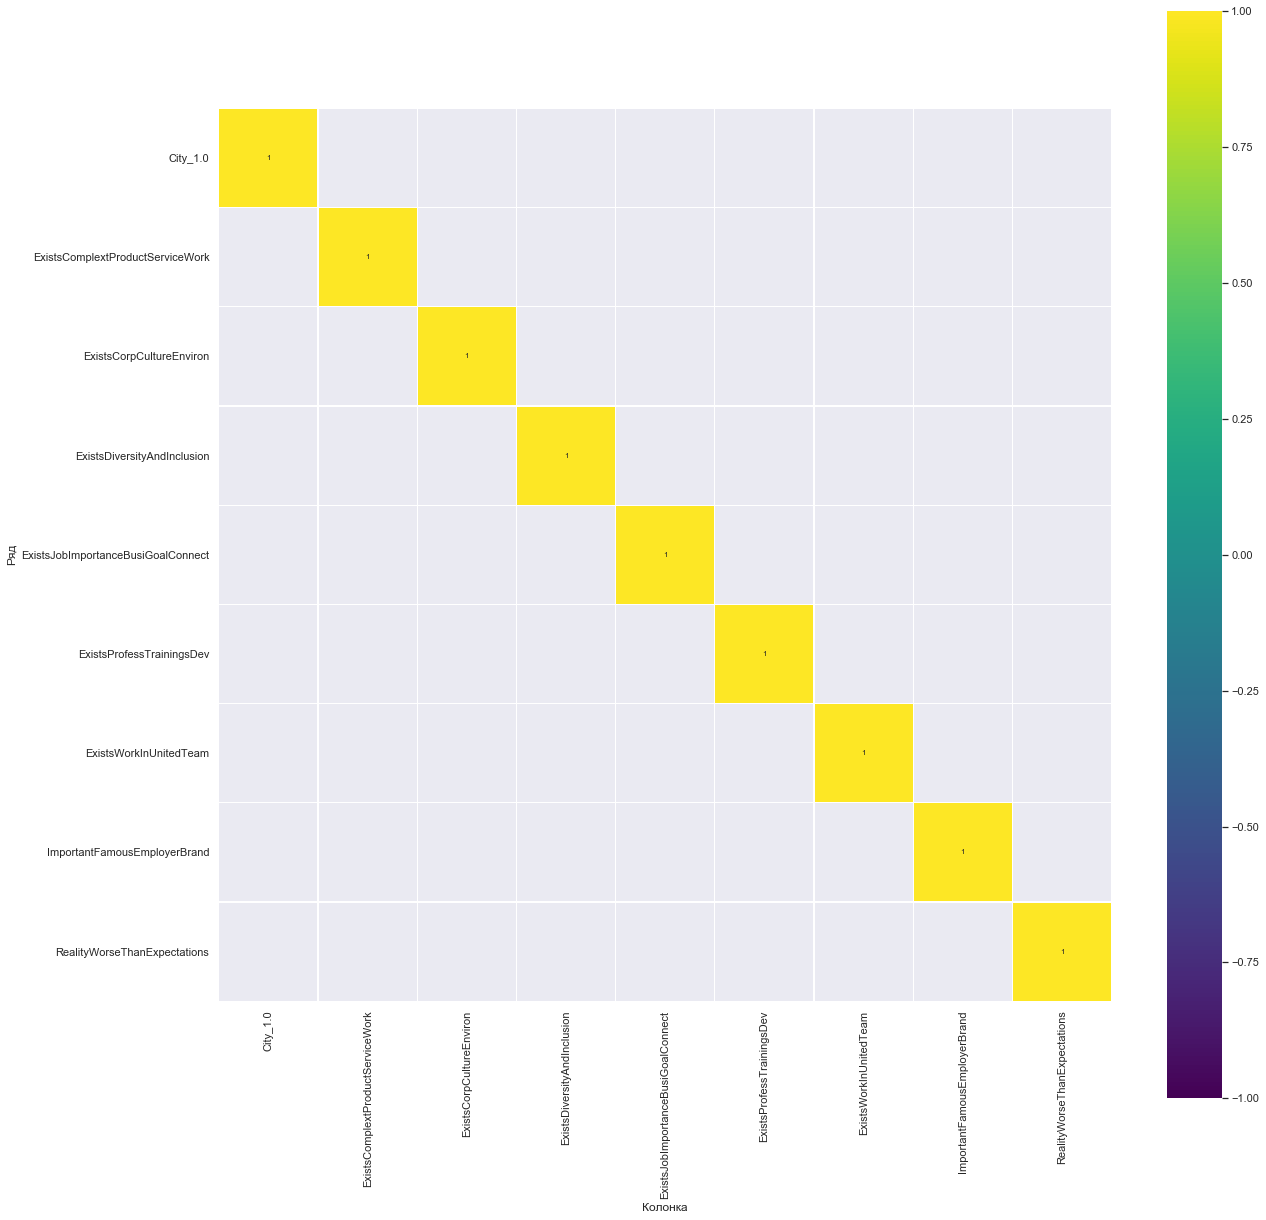

In [68]:
tab = pd.DataFrame()

for i in Talents[list(multi.index)]:
    for j in Talents[list(multi.index)]:
        tabb = Talents[[i,j]].dropna()
        N = matthews_corrcoef(tabb.iloc[:,0], tabb.iloc[:,1])
        Se_new = i
        Sp_new = j
        tab = tab.append({'Ряд': Se_new, 'Колонка': Sp_new, 'Коэфф. Мэтью' : N}, ignore_index=True)

tab = tab.pivot(index='Ряд', columns='Колонка', values='Коэфф. Мэтью')

sns.set(style = 'darkgrid')
plt.figure(figsize=(20, 20))
sns.heatmap(tab[(tab >= 0.3) | (tab <= -0.29)].round(2), cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 8}, square=True)
plt.show()

## IworkherebeacauseIWantRhatherthanMust_targ

In [84]:
reg_data = df.drop(columns=['IworkherebeacauseIWantRhatherthanMust_targ', 'IworkherebeacauseIWantRhatherthanMust']).dropna()
y = df.drop(columns=[]).dropna()[['IworkherebeacauseIWantRhatherthanMust_targ']]
logregr = pd.DataFrame()

for col in reg_data.columns:
    v = reg_data[col].name
    logit_model=sma.GLM(y, sma.add_constant(reg_data[[col]]), family = sma.families.Binomial())
    result=logit_model.fit()
    params = np.exp(result.params)[1]
    conf0 = np.exp(result.conf_int())[0][1]
    conf1 = np.exp(result.conf_int())[1][1]
    p = result.pvalues[1]
    logregr = logregr.append({'Names': v, 'OR': '{0:.2f}'.format(params), 'lower': '{0:.2f}'.format(conf0), 'upper': '{0:.2f}'.format(conf1),'p_val': p}, ignore_index=True)
            
logregr = logregr.reindex(columns=['Names', 'OR', 'lower', 'upper', 'p_val']) 
logregr = logregr[logregr['p_val'] < 0.05]
logregr

C:\Users\lizag\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
C:\Users\lizag\anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


,Names,OR,lower,upper,p_val
11,ExistsTaskVariety,1.67,1.19,2.34,2.850276e-03
13,ExistsProfExperiseIncrease,1.66,1.21,2.26,1.561360e-03
15,ExistsCareerLadderPromot,1.58,1.09,2.29,1.491557e-02
17,ExistsFullCycleDevInfluence,1.75,1.28,2.38,4.412461e-04
19,ExistsModernTechnologyUse,1.43,1.05,1.94,2.262324e-02
21,ExistsComplextProductServiceWork,1.84,1.25,2.70,1.835567e-03
26,ImportantProfessTrainingsDev,1.57,1.10,2.24,1.390217e-02
27,ExistsProfessTrainingsDev,1.42,1.01,2.01,4.418398e-02
31,ExistsOptionsProjectTeamChange,1.81,1.18,2.78,6.244098e-03
33,ExistsShareExperANDEducColleagues,1.78,1.20,2.63,4.031439e-03


In [85]:
multi = regr_multi(Talents.dropna(), group = 'IworkherebeacauseIWantRhatherthanMust_targ', lst = list(logregr['Names']), save_tab = False)
multi[multi['p_val'] < 0.05].drop(columns = 'Names').sort_values('OR', ascending = False)

NameError: name 'regr_multi' is not defined

### надо проверить, фигурируют ли эти переменные выше

In [72]:
df['FullPositiveInformationJobOffer_targ'] = (df['FullPositiveInformationJobOffer'] >= np.median(df['FullPositiveInformationJobOffer'])).astype(int)
df['FullNegativeInformationJobOffer_targ'] = (df['FullNegativeInformationJobOffer'] >= np.median(df['FullNegativeInformationJobOffer'])).astype(int)